In [1]:
import seaborn as sns
import os
import sys
import numpy as np
import random

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.result_buckets import human_results
from experiments.bucket_analysis import BucketDatasetResult

from simple_colors import *
#sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from plotting_utils import plot_isocurves

%load_ext autoreload
%autoreload 2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 20568.38it/s]


### SNLI

In [25]:
plotting_data = {
    'snli': {
        'bow': [0.08, -0.03],
        'gpt3_curie': [-0.13, 0.01],
        'bilstm': [-0.01, -0.05],
        'unified_roberta': [-0.12, 0.055],
        'deberta_v3': [0.01, -0.05],
        'roberta': [0.07, -0.03]
    }, 
    'atomic': {
        'bow': [-0.08, -0.03],
        'gpt3_curie': [-0.13, 0.01],
        'bilstm': [-0.01, -0.05],
        'unified_roberta': [0.05, 0.07],
        'deberta_v3': [0.01, -0.05],
        'roberta': [-0.07, -0.03]
    }, 
    'social': {
        'bow': [0.08, -0.03],
        'gpt3_curie': [-0.13, 0.01],
        'bilstm': [-0.01, -0.05],
        'unified_roberta': [-0.12, 0.055],
        'deberta_v3': [0.01, -0.05],
        'roberta': [0.07, -0.03]
    }
}

In [23]:
def plot_isocurve_consistency_graph(dataset, positionings):

    x = []
    y = []
    names = []

    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    
    for model, results in human_results.items():
        analysis = results[f'{dataset}-human']
        test_results = results[f'{dataset}-test']
    
        linguistic_robustness = analysis.linguistic_robustness_summary(test_results)
        
        x.append(analysis.calculate_weighted_paraphrase_accuracy(test_results))
        y.append(linguistic_robustness['stay_prob_corrected'])
        names.append(model)
        
    
    sns.scatterplot(x=x, y=y, color='#f78d63')
    
    ax = plt.gca()
    ax.set_xlabel("Model Accuracy on Paraphrased Examples ($\widetilde{A}_{🪣}$)")
    ax.set_ylabel(r"Corrected Paraphrastic Consistency ($\widetilde{P}_C$)")
    ax.set_title(f'Paraphrastic Consistency on ParaNLU (δ-{dataset.upper()})')
    
    for i in range(len(names)):
        
        arrow_properties = dict(arrowstyle='->', connectionstyle='arc3', color='#a86832', alpha=0.4)
    
        plt.annotate(names[i], xy=(x[i], y[i]), xytext=(x[i] + positionings[names[i]][0], y[i] + positionings[names[i]][1]), arrowprops=arrow_properties, fontsize=10, ha='center', va='center')
    
    
    plot_isocurves(ax)
    
    plt.savefig(f'modeling_paradigms_pstay_{dataset}.pdf')
    plt.show()


Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


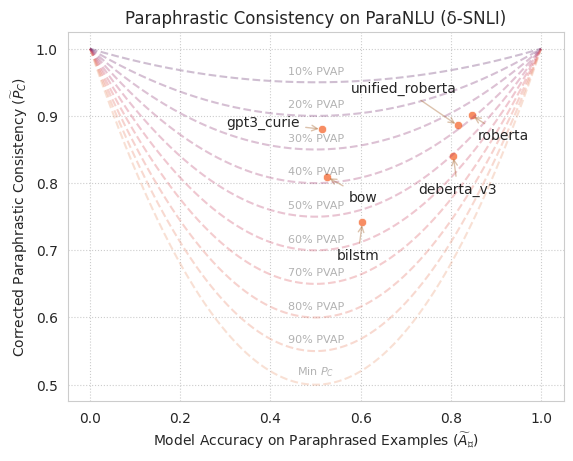

Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


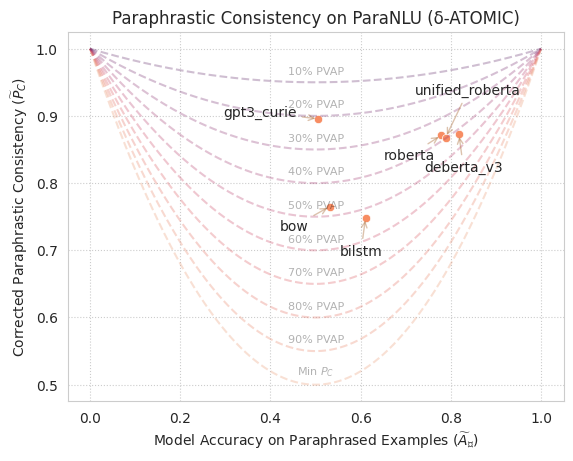

Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


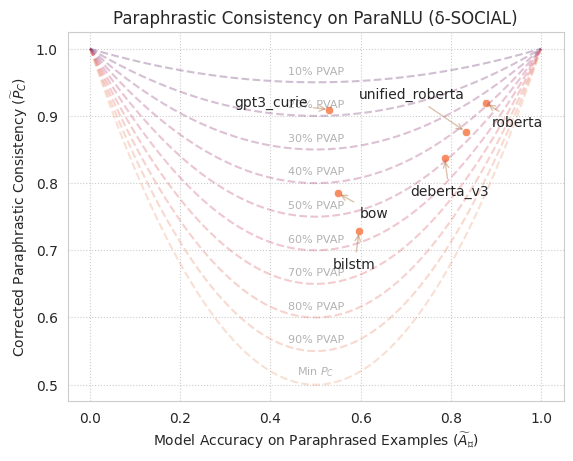

In [26]:
for dataset, positioning in plotting_data.items():
    plot_isocurve_consistency_graph(dataset, positioning)

In [27]:
## section 5 table 3

from tabulate import tabulate

for model, results in human_results.items():
    print(green(model))

    pstay_data = []

    for dataset in ['anli', 'snli', 'atomic', 'social', ]:
        bucket_preds = results[f'{dataset}-human']
        test_preds = results[f'{dataset}-test']

        

        pstay = round(100 * bucket_preds.calculate_p_stay(test_preds)['stay_prob'], 1)
        pstayc = round(100 * bucket_preds.calculate_p_stay(test_preds)['stay_prob_corrected'], 1)
        acc_o = round(100 * bucket_preds.original_example_accuracy(), 1)
        acc_t = round(100 * test_preds.accuracy, 1)
        acc_paranlu_paraphrases = round(100 * bucket_preds.paraphrase_accuracy(), 1)
        acc_paranlu_paraphrases_c = round(100 * bucket_preds.calculate_weighted_paraphrase_accuracy(test_preds), 1)
    
        pstay_data.append([magenta(dataset), acc_o, acc_t, acc_paranlu_paraphrases, acc_paranlu_paraphrases_c, pstay, pstayc])

    print(tabulate(pstay_data, headers=['dataset', 'Acc_Original', 'Acc_Test', 'Acc_🪣', 'Acc_🪣C', 'P(STAY)', 'P(STAY)-corrected']), '\n')

bow
dataset      Acc_Original    Acc_Test    Acc_🪣    Acc_🪣C    P(STAY)    P(STAY)-corrected
---------  --------------  ----------  --------  ---------  ---------  -------------------
anli                 44.8        52.4      44.2       52.4      100                  100
snli                 58          55.7      53.7       52.6       82.2                 80.9
atomic               49.2        53.6      51.4       53.2       76.5                 76.5
social               57.6        61.8      51.4       54.9       78.2                 78.5 

bilstm
dataset      Acc_Original    Acc_Test    Acc_🪣    Acc_🪣C    P(STAY)    P(STAY)-corrected
---------  --------------  ----------  --------  ---------  ---------  -------------------
anli                 53.6        51.6      54.2       51.6      100                  100
snli                 62          68        57.6       60.4       73.2                 74.2
atomic               52.8        67.4      54.2       61.1       73.1                